In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,male,0,112,290,0,0,153,0,0.0,2,1,medium,False
1,42,female,0,102,265,0,0,122,0,0.6,1,0,medium,True
2,65,male,3,138,282,1,0,174,0,1.4,1,1,medium,False
3,45,male,0,104,208,0,0,148,1,3.0,1,0,medium,True
4,58,male,1,120,284,0,0,160,0,1.8,1,0,medium,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,52,male,0,125,212,0,1,168,0,1.0,2,2,high,False
297,58,male,2,140,211,1,0,165,0,0.0,2,0,medium,True
298,57,female,0,140,241,0,1,123,1,0.2,1,0,high,False
299,45,male,1,128,308,0,0,170,0,0.0,2,0,medium,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    object 
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    object 
 13  target    301 non-null    bool   
dtypes: bool(1), float64(1), int64(10), object(2)
memory usage: 31.0+ KB


In [13]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**Preprocessing Data**

In [14]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['sex']=enc.fit_transform(df['sex'])
df['target']=enc.fit_transform(df['target'])
df['thal']=df['thal'].map({'low':1,'medium':2,'high':3})
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
1,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
2,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
3,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
4,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
297,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1


**Applying  machine learning algorithms**

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]



In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,44,1,0,112,290,0,0,153,0,0.0,2,1,2
1,42,0,0,102,265,0,0,122,0,0.6,1,0,2
2,65,1,3,138,282,1,0,174,0,1.4,1,1,2
3,45,1,0,104,208,0,0,148,1,3.0,1,0,2
4,58,1,1,120,284,0,0,160,0,1.8,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,52,1,0,125,212,0,1,168,0,1.0,2,2,3
297,58,1,2,140,211,1,0,165,0,0.0,2,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,1,128,308,0,0,170,0,0.0,2,0,2


In [18]:
y

0      0
1      1
2      0
3      1
4      0
      ..
296    0
297    1
298    0
299    1
300    0
Name: target, Length: 301, dtype: int64

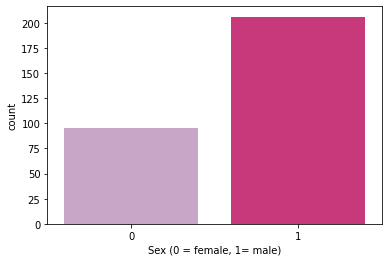

In [19]:
import seaborn as sns
sns.countplot(x='sex', data=df, palette="PuRd")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [20]:
df.sex.value_counts()

1    206
0     95
Name: sex, dtype: int64

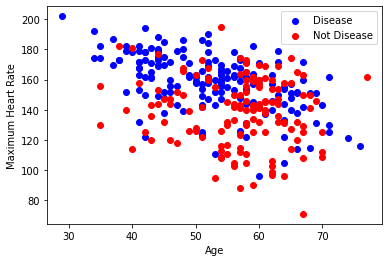

In [21]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="blue")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c = 'red')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [22]:
df.target.value_counts()

1    164
0    137
Name: target, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


In [24]:
test_accuracy={}

In [25]:
train_accuracy={}

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.11%
_______________________________________________
Classification Report:	Precision Score: 83.70%
			Recall Score: 94.17%
			F1 score: 88.63%
_______________________________________________
Confusion Matrix: 
 [[ 83  22]
 [  7 113]]

Test Result:
Accuracy Score: 84.21%
_______________________________________________
Classification Report:	Precision Score: 83.33%
			Recall Score: 90.91%
			F1 score: 86.96%
_______________________________________________
Confusion Matrix: 
 [[24  8]
 [ 4 40]]



In [27]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.111111,84.210526


In [28]:
test_accuracy['Logistic Regression']=accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_accuracy['Logistic Regression']=accuracy_score(y_train, log_reg.predict(X_train)) * 100

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
print_score(KNN_model, X_train, y_train, X_test, y_test, train=False)
print_score(KNN_model, X_train, y_train, X_test, y_test, train=True)

Test Result:
Accuracy Score: 75.00%
_______________________________________________
Classification Report:	Precision Score: 82.05%
			Recall Score: 72.73%
			F1 score: 77.11%
_______________________________________________
Confusion Matrix: 
 [[25  7]
 [12 32]]

Train Result:
Accuracy Score: 76.00%
_______________________________________________
Classification Report:	Precision Score: 75.78%
			Recall Score: 80.83%
			F1 score: 78.23%
_______________________________________________
Confusion Matrix: 
 [[74 31]
 [23 97]]



In [30]:
KNN_prediction = KNN_model.predict(X_test)
accuracy = metrics.accuracy_score(KNN_prediction, y_test)
test_score = accuracy_score(y_test, KNN_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, KNN_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.111111,84.210526
1,K-nearest neighbors,76.000000,75.000000


In [31]:
test_accuracy['K nearest neighbors']=accuracy_score(y_test, KNN_model.predict(X_test)) * 100
train_accuracy['K nearest neighbors']=accuracy_score(y_train, KNN_model.predict(X_train)) * 100

In [32]:
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72        37
           1       0.73      0.82      0.77        39

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



In [33]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[105   0]
 [  0 120]]

Test Result:
Accuracy Score: 78.95%
_______________________________________________
Classification Report:	Precision Score: 91.18%
			Recall Score: 70.45%
			F1 score: 79.49%
_______________________________________________
Confusion Matrix: 
 [[29  3]
 [13 31]]



In [34]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.111111,84.210526
1,K-nearest neighbors,76.000000,75.000000
2,Decision Tree Classifier,100.000000,78.947368


In [35]:
test_accuracy['Decision Tree Classifier']=accuracy_score(y_test, tree.predict(X_test)) * 100
train_accuracy['Decision Tree Classifier']=accuracy_score(y_train, tree.predict(X_train)) * 100

Navie

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

print_score(nb, X_train, y_train, X_test, y_test, train=True)
print_score(nb, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.56%
_______________________________________________
Classification Report:	Precision Score: 83.20%
			Recall Score: 86.67%
			F1 score: 84.90%
_______________________________________________
Confusion Matrix: 
 [[ 84  21]
 [ 16 104]]

Test Result:
Accuracy Score: 82.89%
_______________________________________________
Classification Report:	Precision Score: 84.44%
			Recall Score: 86.36%
			F1 score: 85.39%
_______________________________________________
Confusion Matrix: 
 [[25  7]
 [ 6 38]]



graph


In [37]:
test_score = accuracy_score(y_test, nb.predict(X_test)) * 100
train_score = accuracy_score(y_train, nb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Naive Bayes", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.111111,84.210526
1,K-nearest neighbors,76.000000,75.000000
2,Decision Tree Classifier,100.000000,78.947368
3,Naive Bayes,83.555556,82.894737


In [38]:
test_accuracy['Naive Bayes']=accuracy_score(y_test, nb.predict(X_test)) * 100
train_accuracy['Naive Bayes']=accuracy_score(y_train, nb.predict(X_train)) * 100

Comparison on Test Accuracy


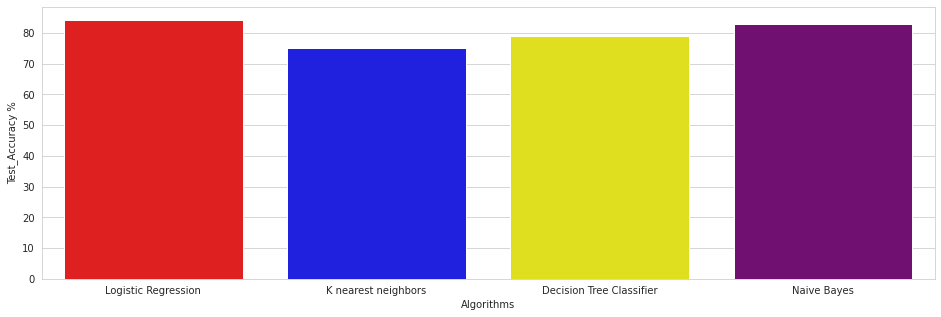

In [39]:
colors = ["red", "blue", "yellow","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test_Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(test_accuracy.keys()), y=list(test_accuracy.values()), palette=colors)
plt.show()

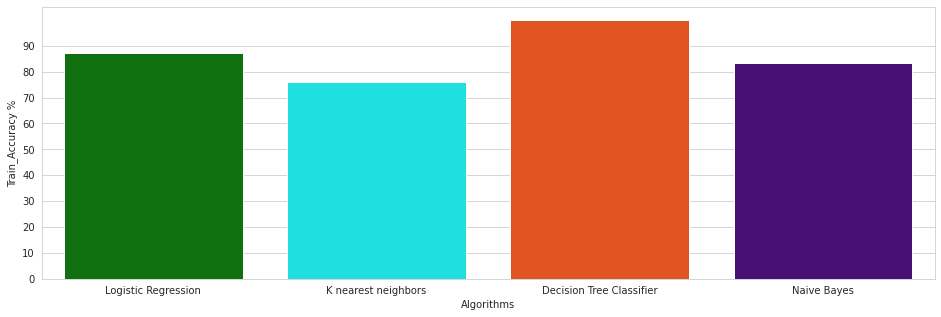

In [40]:
colors = ["green", "cyan", "orangered","indigo"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Train_Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(train_accuracy.keys()), y=list(train_accuracy.values()), palette=colors)
plt.show()